## EDA - Dataset con publicaciones de propiedad de Capital Federal. 
#### Universidad Tecnológica Nacional - Reg. Buenos Aires
#### Ingeniería Industrial - Ciencia de Datos (clusterAI)

#### Noviembre, 2022
<br>

#### Autores:
##### Schiebelbein, Clara


In [ ]:
# Verificamos si estamos en Colab
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)
if var_google_colab: 
  #Montamos nuestro G.Drive
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)

True
Mounted at /content/gdrive


In [ ]:
 if var_google_colab:
 # Direccion root donde está la jupyter-notebook
  root_path = "/content/gdrive/MyDrive/UTN-FRBA/Ciencia de datos/TP_final/"


####Librerias


In [ ]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Importo librerías 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

####DataSet

In [ ]:
# importo el dataset properati
properati= pd.read_csv(root_path+'properati_capital.csv')
#Vemos que se haya importado correctamente
properati.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,63934,MlnOILxnUwm3KXFnNyOJig==,Propiedad,2020-07-06,2021-04-07,2020-07-06,-34.618041,-58.475124,Argentina,Capital Federal,...,1.0,NaN,NaN,89000.0,USD,NaN,Galicia 2800 Depto 2 Ambientes Con Balcón Vill...,XINTEL(JUM-JUM-313) \n\nExcelente departament...,Departamento,Venta
1,660204,FiY707h094LvsqOGHohO9Q==,Propiedad,2020-07-17,9999-12-31,2020-07-17,-34.620686,-58.453972,Argentina,Capital Federal,...,2.0,NaN,NaN,190000.0,USD,NaN,DEPARTAMENTO A ESTRENAR AL FRENTE CON COCHERA,EXCELENTE DPTO A ESTRENAR AL FRENTE CON COCHER...,Departamento,Venta
2,961496,VKAgMtgXuRfeD2XHnLPWNQ==,Propiedad,2020-06-19,2020-12-03,2020-06-19,-34.590569,-58.425215,Argentina,Capital Federal,...,2.0,98.0,68.0,360000.0,USD,NaN,Excelente departamento 4 ambientes con terraza...,Patio El Salvador . inicio de obra nmarzo 2019...,Departamento,Venta
3,292569,H56oekWpzEOKT5aXM43WLA==,Propiedad,2021-02-24,2021-03-01,2021-02-24,-34.577440,-58.485041,Argentina,Capital Federal,...,1.0,118.0,96.0,285000.0,USD,NaN,Venta depto 4 ambientes/terraza en V. Urquiza,Corredor Responsable: MARIANO AUFSEHER - CPI 4...,Departamento,Venta
4,278737,FPPomZ4bizdYOzH9KlsLDg==,Propiedad,2020-11-17,2021-04-13,2020-11-17,-34.615851,-58.439566,Argentina,Capital Federal,...,1.0,61.0,52.0,145000.0,USD,NaN,Departamento de 2 ambientes c terraza a estrenar,Corredor Responsable: MARCELO GRUNBAUM - CMCPS...,Departamento,Venta


In [ ]:
#imprimo las dimensiones del dataset. 
properati.shape

(38656, 26)

In [ ]:
properati.columns

Index(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency',
       'price_period', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

####Limpieza del Dataset

In [ ]:
#elimimo columnas que no me interesa

In [ ]:
#elimino la columna Unnamed:0
properati = properati.drop(['Unnamed: 0','id','ad_type','start_date','end_date','created_on','l1','l2','l4','l5','l6','price_period','title','description'], axis=1)

In [ ]:
#muestro las primeras lineas del dataset 
properati.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,-34.618041,-58.475124,Villa del Parque,2.0,1.0,1.0,NaN,NaN,89000.0,USD,Departamento,Venta
1,-34.620686,-58.453972,Caballito,3.0,2.0,2.0,NaN,NaN,190000.0,USD,Departamento,Venta
2,-34.590569,-58.425215,Palermo,3.0,2.0,2.0,98.0,68.0,360000.0,USD,Departamento,Venta
3,-34.577440,-58.485041,Villa Urquiza,4.0,4.0,1.0,118.0,96.0,285000.0,USD,Departamento,Venta
4,-34.615851,-58.439566,Caballito,2.0,11.0,1.0,61.0,52.0,145000.0,USD,Departamento,Venta


In [ ]:
#imprimo las dimensiones del dataset. 
properati.shape

(38656, 12)

In [ ]:
#verifico que el dataset no cuenta con valores nulos
properati.isnull().any()

lat                 True
lon                 True
l3                  True
rooms               True
bedrooms            True
bathrooms           True
surface_total       True
surface_covered     True
price              False
currency           False
property_type      False
operation_type     False
dtype: bool

In [ ]:
#elimino los valores nulos
properati1=properati.dropna(subset=["lat","lon","l3","rooms","surface_total","surface_covered","price","bathrooms","currency","property_type","operation_type","bedrooms"])

In [ ]:
properati1.shape

(16763, 12)

In [ ]:
#verifico que el dataset no cuenta con valores nulos
properati1.isnull().any()

lat                False
lon                False
l3                 False
rooms              False
bedrooms           False
bathrooms          False
surface_total      False
surface_covered    False
price              False
currency           False
property_type      False
operation_type     False
dtype: bool

In [ ]:
#muestro las primeras lineas del dataset limpio

properati1.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
2,-34.590569,-58.425215,Palermo,3.0,2.0,2.0,98.0,68.0,360000.0,USD,Departamento,Venta
3,-34.577440,-58.485041,Villa Urquiza,4.0,4.0,1.0,118.0,96.0,285000.0,USD,Departamento,Venta
4,-34.615851,-58.439566,Caballito,2.0,11.0,1.0,61.0,52.0,145000.0,USD,Departamento,Venta
5,-34.606540,-58.497938,Villa del Parque,3.0,2.0,1.0,66.0,58.0,153000.0,USD,Departamento,Venta
6,-34.578578,-58.428276,Palermo,3.0,2.0,1.0,78.0,75.0,200000.0,USD,Departamento,Venta


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


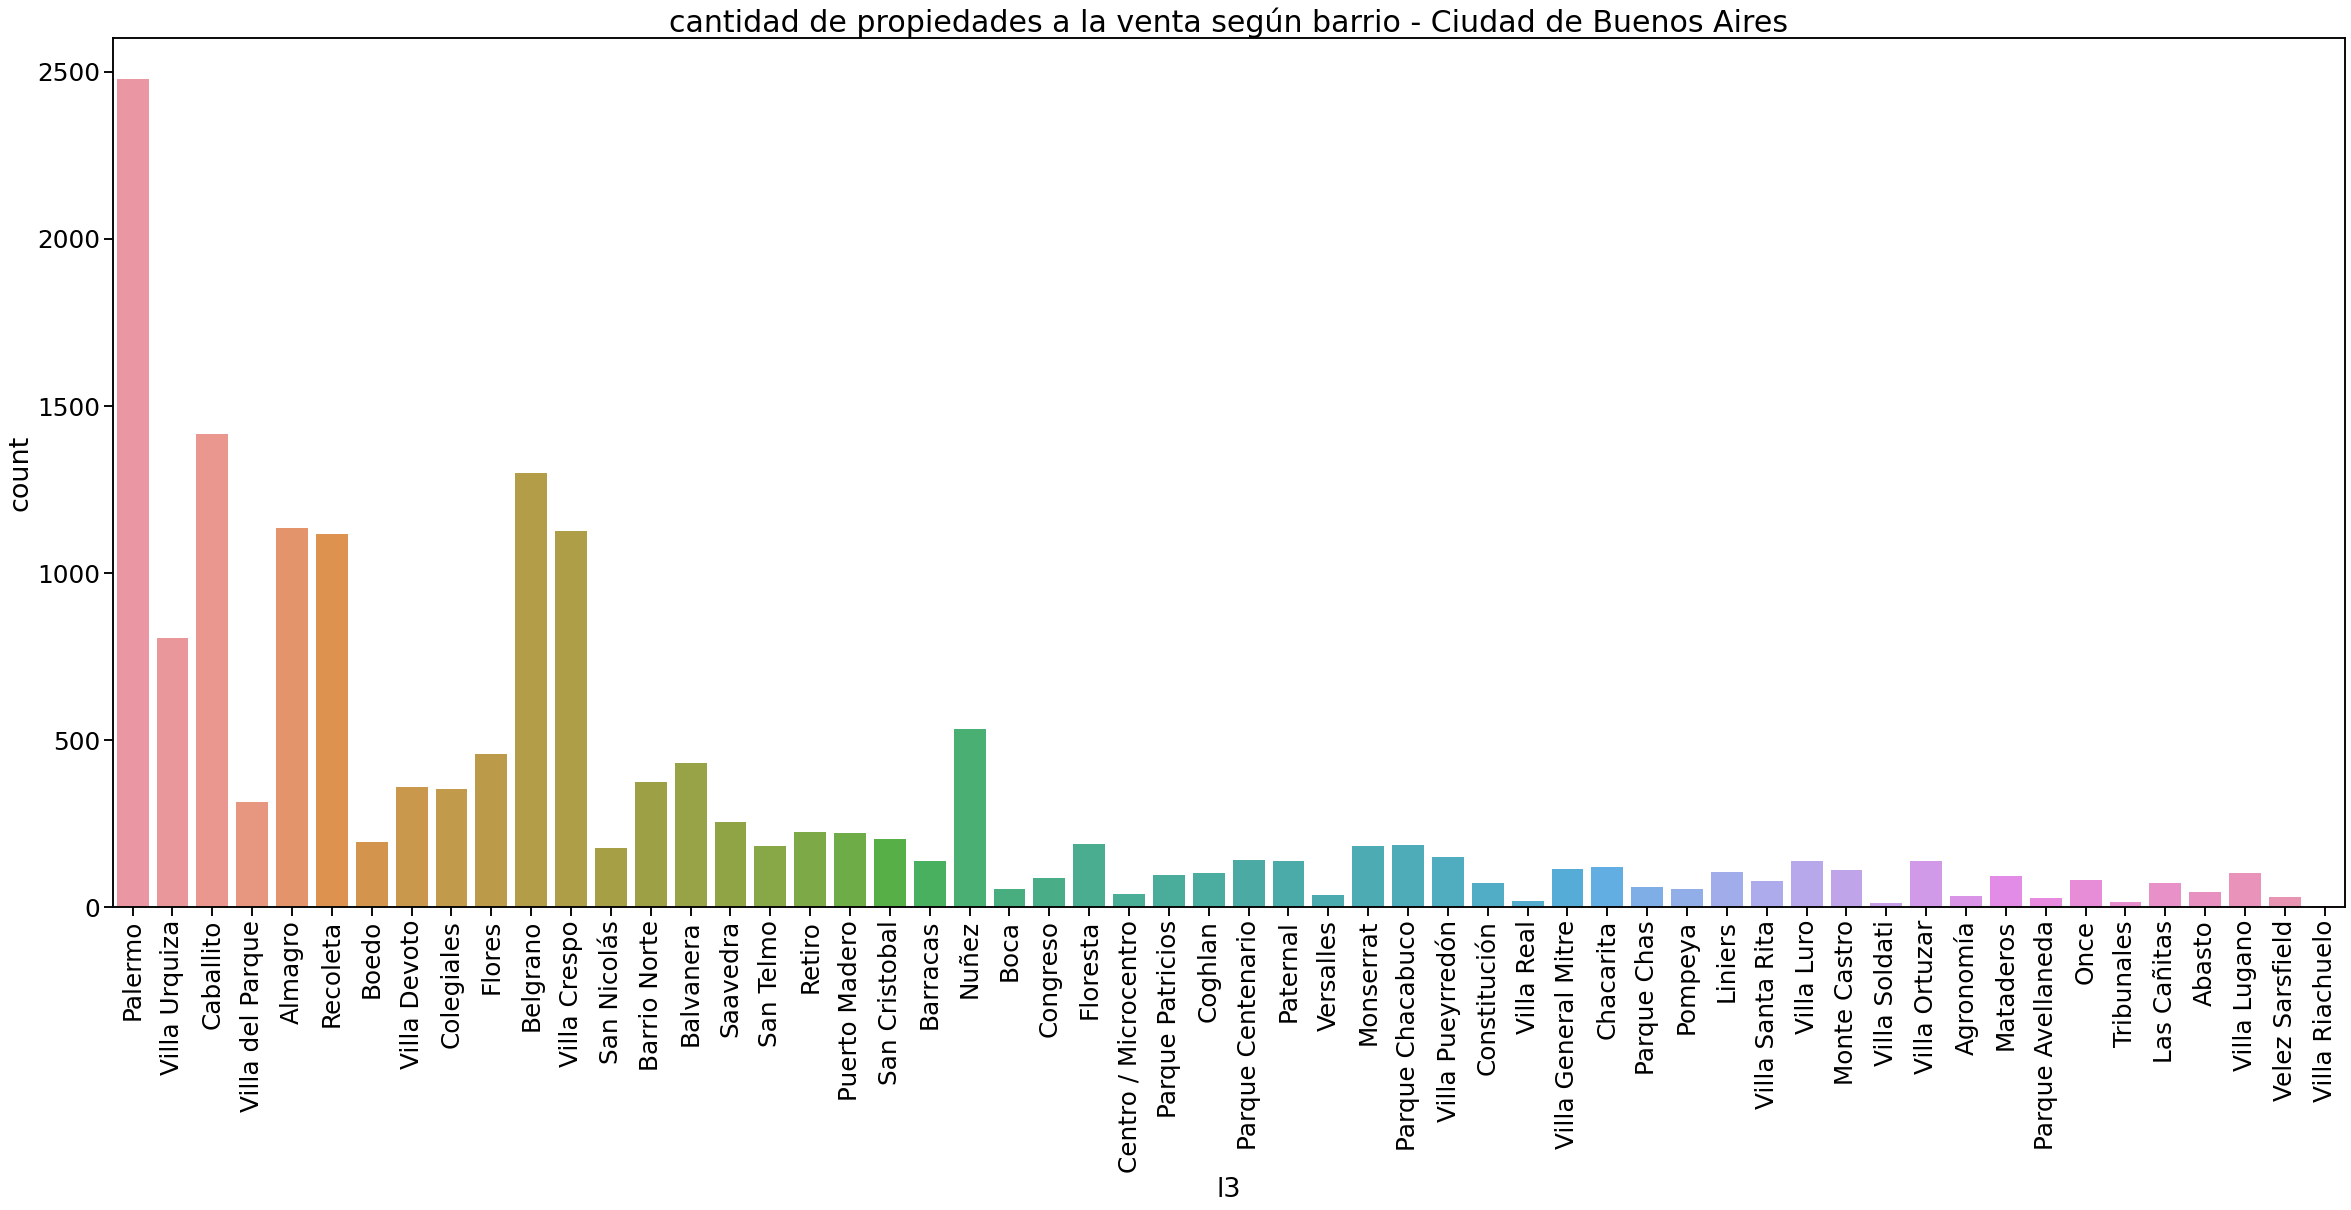

In [ ]:
#grafico
sns.set_context("talk", font_scale=1.5)
plt.figure(figsize=(40,16))
sns.countplot(properati1.l3)
plt.title("cantidad de propiedades a la venta según barrio - Ciudad de Buenos Aires", size=30)
plt.xticks(rotation=90)
plt.show()

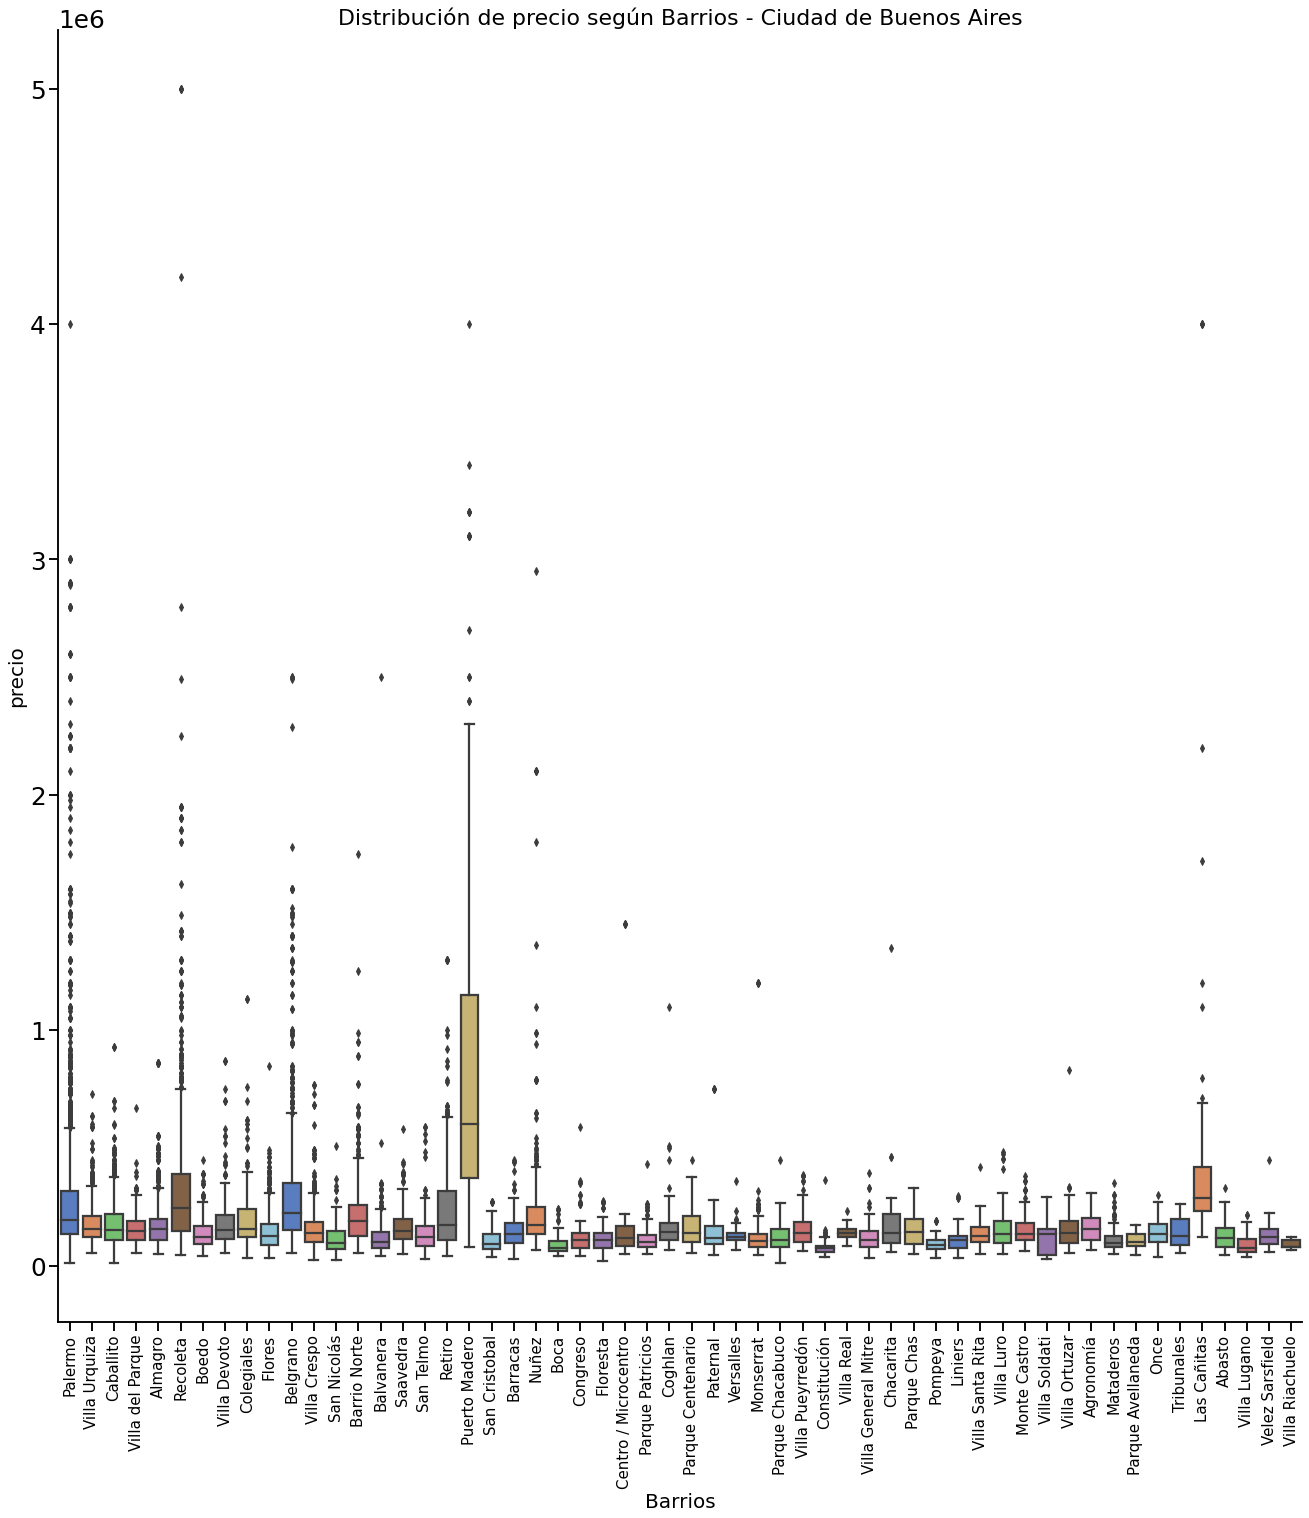

In [ ]:
#boxplot con el precio segun el barrio
g = sns.catplot(x="l3",y="price",
                data=properati1, 
                kind="box",
                palette = "muted",
                height = 20 ,aspect=1)

g.set_xticklabels(rotation=90, fontsize=15)
plt.xlabel("Barrios",size = 20)
plt.ylabel("precio",size = 20)
plt.title('Distribución de precio según Barrios - Ciudad de Buenos Aires',size = 22)
plt.show()

In [ ]:
#Obtengo los percentiles 97 de price y Minimum nights para filtrar outliers de estas features
price_q97 = properati1.price.quantile(0.975)
print("el cuantil 0.97 de la feature 'price' es = " + str(price_q97))

el cuantil 0.97 de la feature 'price' es = 795000.0


In [ ]:
# filtro y conservo los valores que cumplen la condicion
properati1= properati1.loc[(properati1.price < price_q97)]

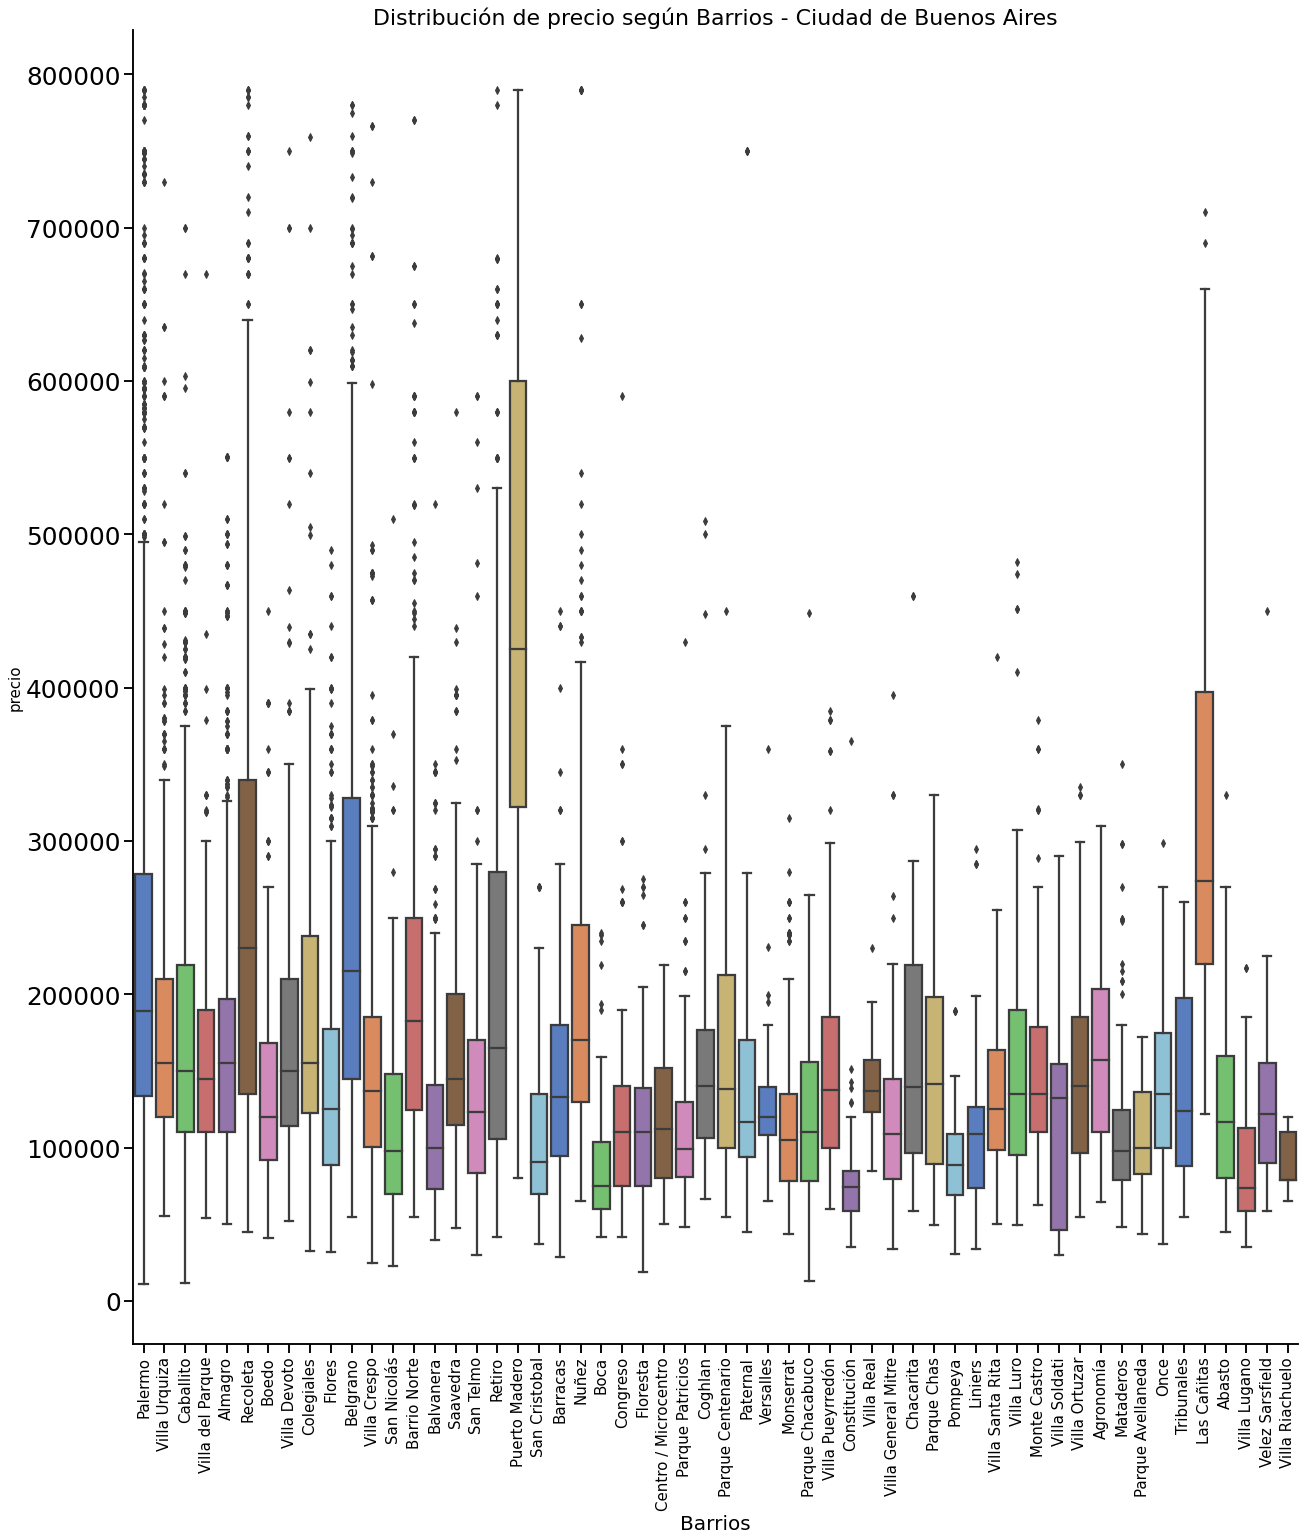

In [ ]:
#grafico nuevamente para observar como quedo limpio el dataset
g = sns.catplot(x="l3",y="price",
                data=properati1, 
                kind="box",
                palette = "muted",
                height = 20 ,aspect=1)

g.set_xticklabels(rotation=90, fontsize=15)
plt.xlabel("Barrios",size = 20)
plt.ylabel("precio",size = 15)
plt.title('Distribución de precio según Barrios - Ciudad de Buenos Aires',size = 22)
plt.show()

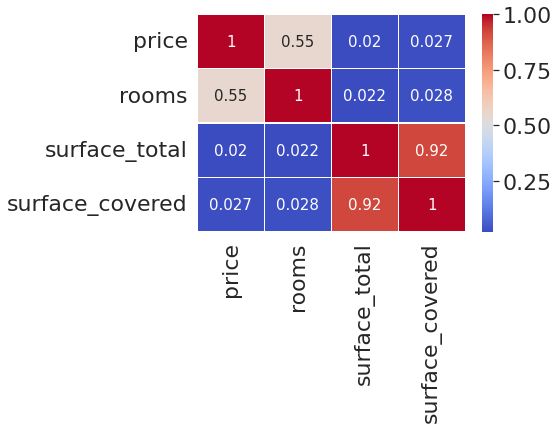

In [ ]:
#muestro la correlacion lineal entre algunas variables
prop_corr = properati1[['price', 'rooms','surface_total', 'surface_covered']]
sns.heatmap(data=prop_corr.corr(), linecolor="white", cbar=True, annot=True, 
            cmap='coolwarm',linewidths=0.2, annot_kws={"size":15})
sns.set(font_scale=2)

In [ ]:
properati1.shape

(16340, 12)

In [ ]:
# Genero las dummies para la variable tipo de propiedad, dentro de la variable type_dummies.
type_dummies = pd.get_dummies(properati1.property_type)
l3_dummies = pd.get_dummies(properati1.l3)

In [ ]:
#muestro la variable
type_dummies.head()

,Departamento,PH
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0


In [ ]:
#agrego al dataset  , las nuevas variables dummnies
properati1= properati1.join(type_dummies)
properati1= properati1.join(l3_dummies)

In [ ]:
properati2 = properati1.drop(['property_type','currency','operation_type','l3','bedrooms'], axis=1)

####Nuevo DataSet

Genero un nuevo dataset con los datos limpios

In [ ]:
properati2.head(10)

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price,Departamento,PH,Abasto,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
2,-34.590569,-58.425215,3.0,2.0,98.0,68.0,360000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.577440,-58.485041,4.0,1.0,118.0,96.0,285000.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-34.615851,-58.439566,2.0,1.0,61.0,52.0,145000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-34.606540,-58.497938,3.0,1.0,66.0,58.0,153000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,-34.578578,-58.428276,3.0,1.0,78.0,75.0,200000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-34.608956,-58.424652,3.0,1.0,84.0,70.0,165000.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,-34.575155,-58.432262,1.0,1.0,33.0,33.0,92000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-34.613303,-58.428096,3.0,2.0,97.0,89.0,259000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,-34.597773,-58.386903,2.0,1.0,30.0,30.0,75000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,-34.598267,-58.419472,2.0,1.0,31.0,30.0,79000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
properati2.shape

(16340, 65)

In [ ]:
##genero un nuevo dataset, un archivo CSV
properati2.to_csv('NewDataSet.csv')
